In [3]:
import sys
sys.path.append("/home/ajag/tcdona3")
import math
from tcdona2.polatis import Polatis
from monitor import RoadmMonitor
from ila import ILA
from bbsource import BBS
import time     
import json
from utils import *
from teraflex import tflex


In [4]:
pol = Polatis()
pol.login()

'\r\n\n   PolatisOXC 24-08-26 19:33:21\r\nM  123 COMPLD\r\n;'

In [5]:
pol = Polatis()
pol.login()

tf = tflex('10.10.10.92')

In [6]:
monitors = [RoadmMonitor('lumentum_4'), RoadmMonitor('lumentum_3'), RoadmMonitor('lumentum_7'), RoadmMonitor('lumentum_9'), RoadmMonitor('lumentum_8'), RoadmMonitor('lumentum_6'), RoadmMonitor('lumentum_5')]
monitor4 = monitors[0]
monitor3 = monitors[1]
monitor7 = monitors[2]
monitor9 = monitors[3]
monitor8 = monitors[4]
monitor6 = monitors[5]
monitor5 = monitors[6]

roadms = [monitor.roadm for monitor in monitors]
roadm4 = roadms[0]
roadm3 = roadms[1]
roadm7 = roadms[2]
roadm9 = roadms[3]
roadm8 = roadms[4]
roadm6 = roadms[5]
roadm5 = roadms[6]

operator_roadms = [roadm3, roadm7, roadm8, roadm9, roadm6, roadm5]
user_roadm = roadm4

Initializing ROADM Monitoring for lumentum_4...
Initializing ROADM Monitoring for lumentum_3...
Initializing ROADM Monitoring for lumentum_7...
Initializing ROADM Monitoring for lumentum_9...
Initializing ROADM Monitoring for lumentum_8...
Initializing ROADM Monitoring for lumentum_6...
Initializing ROADM Monitoring for lumentum_5...


In [10]:
pol.apply_patch_list(test1_patch_list)

tf_1 (1): -4.84 dBm ---> splitter_1_2x2_p1 (545): -6.61 dBm < 20.00 dBm
arof_sig (231): -28.41 dBm ---> splitter_1_2x2_p2 (546): -48.01 dBm < 20.00 dBm
tf_2 (2): -6.14 dBm ---> roadm_4_p2 (433): -7.92 dBm < 20.00 dBm
tf_3 (3): -6.10 dBm ---> roadm_4_p3 (434): -7.70 dBm < 20.00 dBm
splitter_1_2x2_p1 (225): -10.68 dBm ---> roadm_4_p1 (427): -12.17 dBm < 20.00 dBm
roadm_4_line (214): -28.61 dBm ---> fiber_temp_100m (401): -48.55 dBm < 20.00 dBm
fiber_temp_100m (81): -28.31 dBm ---> roadm_3_line (535): -46.66 dBm < 20.00 dBm
roadm_3_p1 (106): -15.21 dBm ---> fiber_7_510m (359): -16.63 dBm < 20.00 dBm
fiber_7_510m (39): -17.45 dBm ---> roadm_7_line (531): -19.19 dBm < 20.00 dBm
roadm_7_p1 (110): -14.50 dBm ---> roadm_7_p1 (430): -15.69 dBm < 20.00 dBm
roadm_7_line (211): -11.92 dBm ---> fiber_19_12646m (375): -13.28 dBm < 20.00 dBm
fiber_19_12646m (55): -16.54 dBm ---> roadm_8_line (530): -18.08 dBm < 20.00 dBm
roadm_8_p1 (111): -11.08 dBm ---> roadm_8_p1 (431): -12.54 dBm < 20.00 dBm
roadm

In [11]:
pol.print_patch_table(test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	tf_1	Out	1	-4.83
1	splitter_1_2x2_p1	In	545	-6.53
2	arof_sig	Out	231	4.62
3	splitter_1_2x2_p2	In	546	3.53
4	tf_2	Out	2	-6.1
5	roadm_4_p2	In	433	-8.01
6	tf_3	Out	3	-6.12
7	roadm_4_p3	In	434	-7.65
8	splitter_1_2x2_p1	Out	225	-0.68
9	roadm_4_p1	In	427	-2.05
10	roadm_4_line	Out	214	-28.59
11	fiber_temp_100m	In	401	-48.23
12	fiber_temp_100m	Out	81	-28.31
13	roadm_3_line	In	535	-46.82
14	roadm_3_p1	Out	106	-15.24
15	fiber_7_510m	In	359	-16.63
16	fiber_7_510m	Out	39	-17.45
17	roadm_7_line	In	531	-19.17
18	roadm_7_p1	Out	110	-14.47
19	roadm_7_p1	In	430	-15.69
20	roadm_7_line	Out	211	-11.94
21	fiber_19_12646m	In	375	-13.26
22	fiber_19_12646m	Out	55	-16.52
23	roadm_8_line	In	530	-18.05
24	roadm_8_p1	Out	111	-11.06
25	roadm_8_p1	In	431	-12.53
26	roadm_8_line	Out	210	-9.94
27	fiber_18_25220m	In	374	-11.35
28	fiber_18_25220m	Out	54	-17.9
29	roadm_9_line	In	529	-19.43
30	roadm_9_p1	Out	112	-12.34
31	roadm_9_p1	In	432	-13.81
32	roadm_9_line	Out	209	-6.94
33	fiber_22

In [2]:
# This block only needs to execte once for the experiment. Caution: Do not run this many times

# for roadm in roadms:
#     roadm.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')
#     roadm.edfa_config('preamp', target_gain=10.0, control_mode='constant-gain')

# time.sleep(30)

# for roadm in roadms:
#     roadm.make_grid('both', list(range(1,96)))

# time.sleep(30)

# for roadm in roadms:
#     roadm.disable_als(600)

In [97]:
tf.change_configuration(line_port='1/2/n1', logical_interface='ot600', modulation='dp-64qam', target_power=-6.0, fec='sdfec-acacia27-7iterations', central_frequency=193100000)
tf.change_configuration(line_port='1/1/n2', logical_interface='ot600', modulation='dp-64qam', target_power=-6.2, fec='sdfec-acacia27-7iterations', central_frequency=193000000)
tf.change_configuration(line_port='1/1/n1', logical_interface='ot400', modulation='dp-64qam', target_power=-6.6, fec='sdfec-acacia27-7iterations', central_frequency=192900000)

30

In [7]:
tf.change_configuration(line_port='1/1/n1', logical_interface='ot400', modulation='dp-64qam', target_power=-4.6, fec='sdfec-acacia27-7iterations', central_frequency=192900000)

30

In [7]:
for roadm in roadms:
    roadm.disable_als(600)

In [11]:
# user_grid = {(32):1, (34):2, (36):3}

# user_roadm_mux_conn = operator_flex_grid_mux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0)
# user_roadm.wss_delete_connection(1, 'all')
# user_roadm.wss_add_connections(user_roadm_mux_conn)

# time.sleep(5)

# user_roadm_demux_conn = operator_flex_grid_demux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0)
# user_roadm.wss_delete_connection(2, 'all')
# user_roadm.wss_add_connections(user_roadm_demux_conn)

In [12]:
# osaas_grid = {(30,31,32,33,34,35,36,37,38):1}

# for roadm in operator_roadms:

#     demux_conn_list = operator_flex_grid_demux_connections(roadm, osaas_grid, open_channels = wdm_channel_list, loss=0.0)
#     roadm.wss_delete_connection(2, 'all')
#     roadm.wss_add_connections(demux_conn_list)

# time.sleep(5)

# user_roadm_demux_conn = operator_flex_grid_demux_connections(user_roadm, user_grid, open_channels=wdm_channel_list, loss=0.0, default_port=4)
# user_roadm.wss_delete_connection(2, 'all')
# user_roadm.wss_add_connections(user_roadm_demux_conn)

In [5]:
roadm4.edfa_config('booster', target_gain=7.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 15.0, 'target_gain': 7.0, 'target_gain_tilt': 0.0, 'input_power': -7.5, 'output_power': -0.24, 'voa_input_power': 0.85, 'voa_output_power': -15.7, 'voa_attenuation': 16.55}


In [6]:
roadm3.edfa_config('preamp', target_gain=10.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 20.0, 'target_gain': 12.5, 'target_gain_tilt': 0.0, 'input_power': -4.58, 'output_power': 7.99, 'voa_input_power': 5.29, 'voa_output_power': -12.27, 'voa_attenuation': 17.56}


In [36]:
roadm7.edfa_config('booster', target_gain=7.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 1.0, 'target_gain': 9.0, 'target_gain_tilt': 0.0, 'input_power': -5.47, 'output_power': 3.62, 'voa_input_power': 1.49, 'voa_output_power': -3.64, 'voa_attenuation': 5.15}


In [41]:
roadm8.edfa_config('booster', target_gain=6.5, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': -3.0, 'target_gain': 11.0, 'target_gain_tilt': 0.0, 'input_power': -4.63, 'output_power': 6.39, 'voa_input_power': 3.8, 'voa_output_power': -0.1, 'voa_attenuation': 3.89}


In [44]:
roadm9.edfa_config('booster', target_gain=10.7, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': -3.0, 'target_gain': 10.5, 'target_gain_tilt': 0.0, 'input_power': -8.7, 'output_power': 1.98, 'voa_input_power': -0.71, 'voa_output_power': -4.42, 'voa_attenuation': 3.72}


In [49]:
roadm6.edfa_config('booster', target_gain=10.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 10.0, 'target_gain': 10.5, 'target_gain_tilt': 0.0, 'input_power': -8.29, 'output_power': 2.37, 'voa_input_power': 1.02, 'voa_output_power': -13.46, 'voa_attenuation': 14.47}


In [53]:
roadm5.edfa_config('booster', target_gain=5.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 0.0, 'target_gain': 6.0, 'target_gain_tilt': 0.0, 'input_power': -3.3, 'output_power': 2.76, 'voa_input_power': 1.5, 'voa_output_power': -7.51, 'voa_attenuation': 9.01}


In [9]:
roadm3.edfa_config('booster', target_gain=12.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 0.0, 'target_gain': 11.0, 'target_gain_tilt': 0.0, 'input_power': -10.01, 'output_power': 1.16, 'voa_input_power': 0.32, 'voa_output_power': -12.5, 'voa_attenuation': 12.85}


In [84]:
pol.apply_patch_list([('roadm_4_line', 'arof_sig')])

roadm_4_line (214): -0.92 dBm ---> arof_sig (551): -2.03 dBm < 20.00 dBm


In [123]:
roadm4.disable_als(600)

In [94]:
roadm4.edfa_config('booster', target_gain=13.0, control_mode='constant-gain')

{'control_mode': 'constant-gain', 'maintenance-state': 'in-service', 'target_power': 15.0, 'target_gain': 15.0, 'target_gain_tilt': 0.0, 'input_power': -7.26, 'output_power': 7.79, 'voa_input_power': 2.35, 'voa_output_power': -6.36, 'voa_attenuation': 8.71}


In [124]:
roadm4.get_mux_monitored_power()

[(1, 0.4), (2, 1.2), (3, 1.0)]

In [120]:
roadm4.get_mux_connection_input_power()

[(1, -39.5), (2, -7.9), (3, -40.4)]

In [140]:
pol.print_patch_table([('roadm_4_line', 'arof_sig')])

#	Component	I/O	Port	Power (dBm)
0	roadm_4_line	Out	214	-28.59
1	arof_sig	In	551	-47.28


In [72]:
pol.print_patch_table(patch_list=test1_patch_list)

#	Component	I/O	Port	Power (dBm)
0	tf_1	Out	1	-6.03
1	roadm_4_p1	In	427	-7.72
2	tf_2	Out	2	-6.12
3	roadm_4_p2	In	433	-7.99
4	tf_3	Out	3	-6.69
5	roadm_4_p3	In	434	-8.28
6	roadm_4_line	Out	214	-0.95
7	fiber_temp_100m	In	401	-2.3
8	fiber_temp_100m	Out	81	-2.78
9	roadm_3_line	In	535	-4.23
10	roadm_3_p1	Out	106	1.7
11	fiber_7_510m	In	359	0.29
12	fiber_7_510m	Out	39	-0.55
13	roadm_7_line	In	531	-2.3
14	roadm_7_p1	Out	110	0.27
15	roadm_7_p1	In	430	-0.89
16	roadm_7_line	Out	211	1.43
17	fiber_19_12646m	In	375	0.12
18	fiber_19_12646m	Out	55	-3.16
19	roadm_8_line	In	530	-4.73
20	roadm_8_p1	Out	111	0.94
21	roadm_8_p1	In	431	-0.53
22	roadm_8_line	Out	210	1.54
23	fiber_18_25220m	In	374	0.15
24	fiber_18_25220m	Out	54	-6.4
25	roadm_9_line	In	529	-7.94
26	roadm_9_p1	Out	112	-2.18
27	roadm_9_p1	In	432	-3.63
28	roadm_9_line	Out	209	1.93
29	fiber_22_25332m	In	378	0.23
30	fiber_22_25332m	Out	58	-6.23
31	roadm_6_line	In	532	-7.78
32	roadm_6_p1	Out	109	-2.72
33	roadm_6_p1	In	429	-3.96
34	roadm_6_line	Out	212

In [12]:
test_conn = generate_wide_channel_mux(roadm4, [1,2], 4101)

1 1 in-service false 4101 4201 191325.0 191425.0 4.00 CH1


In [43]:
192850+62.5

192912.5

In [121]:
blocked_='false'
cur_conn1 = roadm4.WSSConnection(
        1, '1', 'in-service', blocked_,
        4101, 4201,
        str(192865.62),
        str(192934.37),
        '{:.2f}'.format(0.0),  'CH' + '1'
    )

cur_conn2 = roadm4.WSSConnection(
        1, '2', 'in-service', blocked_,
        4102, 4201,
        str(192956.25),
        str(193043.75),
        '{:.2f}'.format(0.0),  'CH' + '2'
    )

cur_conn3 = roadm4.WSSConnection(
        1, '3', 'in-service', blocked_,
        4103, 4201,
        str(193056.25),
        str(193143.75),
        '{:.2f}'.format(0.0),  'CH' + '3'
    )


conn_list = [cur_conn1, cur_conn2, cur_conn3]

In [122]:
roadm4.wss_delete_connection(1, 'all')
roadm4.wss_add_connections(conn_list)

In [100]:
blocked_='false'
cur_conn1 = roadm4.WSSConnection(
        2, '1', 'in-service', blocked_,
        5101, 5203,
        str(192856.25),
        str(192943.75),
        '{:.2f}'.format(0.0),  'CH' + '1'
    )

cur_conn2 = roadm4.WSSConnection(
        2, '2', 'in-service', blocked_,
        5101, 5202,
        str(192956.25),
        str(193043.75),
        '{:.2f}'.format(0.0),  'CH' + '2'
    )

cur_conn3 = roadm4.WSSConnection(
        2, '3', 'in-service', blocked_,
        5101, 5201,
        str(193065.62),
        str(193134.37),
        '{:.2f}'.format(0.0),  'CH' + '3'
    )


conn_list = [cur_conn1, cur_conn2, cur_conn3]

In [101]:
roadm4.wss_delete_connection(2, 'all')
roadm4.wss_add_connections(conn_list)

Waiting 3 seconds for ROADM measurements to stabilize...

ROADM measurements started at 2024-08-26 17:24:51.312923


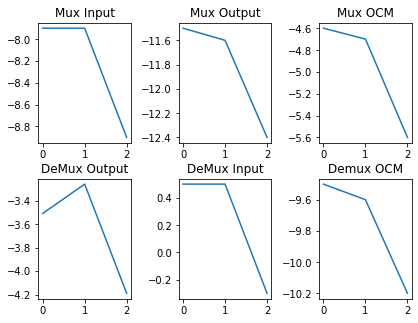

In [66]:
monitor4.plot_power('all', refresh=True, notebook=True)

In [67]:
tf.read_pm_data(10, '1/1/n1')

{'ImpTF600g64QNorm_indefinite_sop-tracking': '0',
 'CarrierTF_indefinite_opt-rcv-pwr': '-6.2',
 'Carrier_15min_opt-rcv-pwr-lo': '-38.9',
 'Carrier_15min_opt-rcv-pwr-mean': '-9.0',
 'Carrier_15min_opt-rcv-pwr-hi': '-6.1',
 'Carrier_24hour_opt-rcv-pwr-lo': '-53.2',
 'Carrier_24hour_opt-rcv-pwr-mean': '-11.5',
 'Carrier_24hour_opt-rcv-pwr-hi': '-4.6',
 'QualityTF_indefinite_carrier-frequency-offset': '-0.005',
 'QualityTF_indefinite_q-factor': '6.0',
 'QualityTF_indefinite_polarization-dependent-loss': '0.6',
 'Quality_15min_carrier-frequency-offset-lo': '-0.019',
 'Quality_15min_carrier-frequency-offset-mean': '0.0',
 'Quality_15min_carrier-frequency-offset-hi': '0.019',
 'Quality_15min_q-factor-lo': '0.0',
 'Quality_15min_q-factor-mean': '4.2',
 'Quality_15min_q-factor-hi': '6.0',
 'Quality_15min_polarization-dependent-loss-lo': '0.0',
 'Quality_15min_polarization-dependent-loss-mean': '0.4',
 'Quality_15min_polarization-dependent-loss-hi': '1.1',
 'Quality_24hour_carrier-frequency-offs

In [68]:
tf.read_pm_data(10, '1/1/n2')

{'ImpTF600g64QNorm_indefinite_sop-tracking': '45',
 'CarrierTF_indefinite_opt-rcv-pwr': '-5.9',
 'Carrier_15min_opt-rcv-pwr-lo': '-52.2',
 'Carrier_15min_opt-rcv-pwr-mean': '-10.7',
 'Carrier_15min_opt-rcv-pwr-hi': '-5.7',
 'Carrier_24hour_opt-rcv-pwr-lo': '-52.3',
 'Carrier_24hour_opt-rcv-pwr-mean': '-17.3',
 'Carrier_24hour_opt-rcv-pwr-hi': '-5.7',
 'QualityTF_indefinite_carrier-frequency-offset': '-0.007',
 'QualityTF_indefinite_q-factor': '6.0',
 'QualityTF_indefinite_polarization-dependent-loss': '0.7',
 'Quality_15min_carrier-frequency-offset-lo': '-0.02',
 'Quality_15min_carrier-frequency-offset-mean': '0.0',
 'Quality_15min_carrier-frequency-offset-hi': '0.018',
 'Quality_15min_q-factor-lo': '0.0',
 'Quality_15min_q-factor-mean': '3.9',
 'Quality_15min_q-factor-hi': '6.0',
 'Quality_15min_polarization-dependent-loss-lo': '0.0',
 'Quality_15min_polarization-dependent-loss-mean': '0.3',
 'Quality_15min_polarization-dependent-loss-hi': '1.3',
 'Quality_24hour_carrier-frequency-off

In [69]:
tf.read_pm_data(10, '1/2/n1')

{'ImpTF400g64QNorm_indefinite_sop-tracking': '0',
 'CarrierTF_indefinite_opt-rcv-pwr': '-6.7',
 'Carrier_15min_opt-rcv-pwr-lo': '-49.9',
 'Carrier_15min_opt-rcv-pwr-mean': '-10.9',
 'Carrier_15min_opt-rcv-pwr-hi': '-6.5',
 'Carrier_24hour_opt-rcv-pwr-lo': '-50.0',
 'Carrier_24hour_opt-rcv-pwr-mean': '-8.2',
 'Carrier_24hour_opt-rcv-pwr-hi': '-6.3',
 'QualityTF_indefinite_carrier-frequency-offset': '0.005',
 'QualityTF_indefinite_q-factor': '6.0',
 'QualityTF_indefinite_polarization-dependent-loss': '0.9',
 'Quality_15min_carrier-frequency-offset-lo': '-0.017',
 'Quality_15min_carrier-frequency-offset-mean': '0.0',
 'Quality_15min_carrier-frequency-offset-hi': '0.015',
 'Quality_15min_q-factor-lo': '0.0',
 'Quality_15min_q-factor-mean': '4.1',
 'Quality_15min_q-factor-hi': '6.0',
 'Quality_15min_polarization-dependent-loss-lo': '0.0',
 'Quality_15min_polarization-dependent-loss-mean': '0.4',
 'Quality_15min_polarization-dependent-loss-hi': '1.1',
 'Quality_24hour_carrier-frequency-offse